# Analyse

## Plot 1 mit festem a

In [1]:
from src.primality.criteria import *
from src.primality.tests import *
from src.analysis.timing import measure_runtime
from src.analysis.plot import plot_runtime

# Beispielhafte n-Werte
numbers = list(range(100_000, 1_000_000, 100_000))  # Von 100.000 bis 1.000.000 in Schritten von 100.000
#numbers = list(range(10_000, 100_000, 10_000))  # Von 100.000 bis 1.000.000 in Schritten von 100.000

# Liste von Zahlen, für die die Tests durchgeführt werden sollen
#numbers = [5, 10, 20, 50, 100, 200, 500, 1000]

# Messung der Laufzeiten für jedes Kriterium
fermat_results = measure_runtime(lambda n: fermat_criterion(a=2, n=n), numbers, label="Fermat-Test mit a=2")
wilson_results = measure_runtime(lambda n: wilson_criterion(n), numbers, label="Wilson-Test")
initial_lucas_results = measure_runtime(lambda n: initial_lucas_test(a=2, n=n), numbers, label="Initialer Lucas-Test mit a=2")
lucas_results = measure_runtime(lambda n: lucas_test(a=2, n=n), numbers, label="Lucas-Test mit a=2")
optimized_lucas_results = measure_runtime(lambda n: optimized_lucas_test(n), numbers, label="Optimierter Lucas-Test")

# Vorbereitung der Daten für den Plot
n_fermat = [result["n"] for result in fermat_results]
n_wilson = [result["n"] for result in wilson_results]
n_initial_lucas = [result["n"] for result in initial_lucas_results]
n_lucas = [result["n"] for result in lucas_results]
n_optimized_lucas = [result["n"] for result in optimized_lucas_results]

time_fermat = [result["time"] for result in fermat_results]
time_wilson = [result["time"] for result in wilson_results]
time_initial_lucas = [result["time"] for result in initial_lucas_results]
time_lucas = [result["time"] for result in lucas_results]
time_optimized_lucas = [result["time"] for result in optimized_lucas_results]

labels = [
    "Fermat-Test mit a=2",
    "Wilson-Test",
    "Initialer Lucas-Test mit a=2",
    "Lucas-Test mit a=2",
    "Optimierter Lucas-Test"
]
# Erstellen des Plots
plot_runtime(
    n_lists=[n_fermat, n_wilson, n_initial_lucas, n_lucas, n_optimized_lucas],
    time_lists=[time_fermat, time_wilson, time_initial_lucas, time_lucas, time_optimized_lucas],
    labels=labels
)

TypeError: fermat_criterion() got an unexpected keyword argument 'a'

## Plot 2 mit zufälligem a 

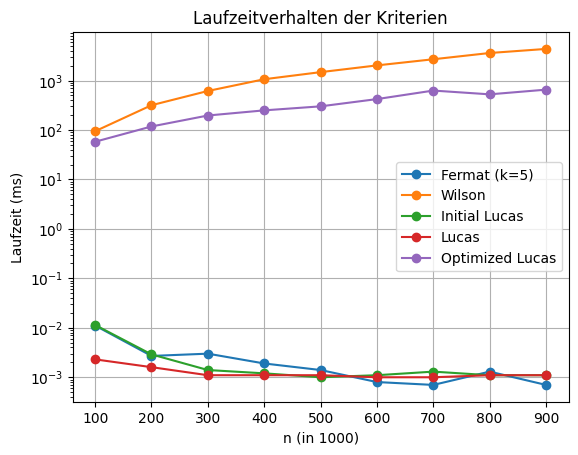

In [2]:
from src.primality.criteria import *
from src.primality.tests import *
from src.analysis.timing import measure_runtime
from src.analysis.plot import plot_runtime

# Beispielhafte n-Werte
numbers = list(range(100_000, 1_000_000, 100_000))  # Von 100.000 bis 1.000.000 in Schritten von 100.000
#numbers = list(range(10_000, 100_000, 10_000))  # Von 100.000 bis 1.000.000 in Schritten von 100.000

# Messung der Laufzeiten
fermat_times = measure_runtime(lambda n: fermat_criterion(n, 5), numbers, "Fermat (k=5)")
wilson_times = measure_runtime(wilson_criterion, numbers, "Wilson")
initial_lucas_times = measure_runtime(initial_lucas_test, numbers, "Initial Lucas")
lucas_times = measure_runtime(lucas_test, numbers, "Lucas")
optimized_lucas_times = measure_runtime(optimized_lucas_test, numbers, "Optimized Lucas")

# Vorbereitung der Plot-Daten
n_values = [result["n"] for result in fermat_times]
time_data = [
    [result["time"] for result in fermat_times],
    [result["time"] for result in wilson_times],
    [result["time"] for result in initial_lucas_times],
    [result["time"] for result in lucas_times],
    [result["time"] for result in optimized_lucas_times]
]
labels = ["Fermat (k=5)", "Wilson", "Initial Lucas", "Lucas", "Optimized Lucas"]

# Erstelle den Plot
plot_runtime(
    n_lists=[n_values] * len(time_data),  # Gleiche n-Werte für alle
    time_lists=time_data,
    labels=labels
)

## Plot 3 verbessert


Teste n = 100003
Fermat: Prim
  Iteration 1: a=42842 → Bestanden
  Iteration 2: a=40729 → Bestanden
  Iteration 3: a=94101 → Bestanden
Wilson: Prim (kein a)
Initial Lucas: Zusammengesetzt
  a=67954: Bedingung 1 OK
  Abbruch bei m=14286
Lucas: Zusammengesetzt
  a=8371: Bedingung 1 OK
  Abbruch bei m=7143
Optimierter Lucas: Prim
  Faktor q=2:
    a=2: OK
  Faktor q=3:
    a=2: OK
  Faktor q=7:
    a=2: OK
  Faktor q=2381:
    a=2: OK

Teste n = 100019
Fermat: Prim
  Iteration 1: a=14639 → Bestanden
  Iteration 2: a=10654 → Bestanden
  Iteration 3: a=56287 → Bestanden
Wilson: Prim (kein a)
Initial Lucas: Zusammengesetzt
  a=91541: Bedingung 1 OK
  Abbruch bei m=50009
Lucas: Zusammengesetzt
  a=48953: Bedingung 1 OK
  Abbruch bei m=50009
Optimierter Lucas: Prim
  Faktor q=2:
    a=2: OK
  Faktor q=43:
    a=2: OK
  Faktor q=1163:
    a=2: OK

Teste n = 100043
Fermat: Prim
  Iteration 1: a=67748 → Bestanden
  Iteration 2: a=82719 → Bestanden
  Iteration 3: a=80739 → Bestanden
Wilson: Prim 

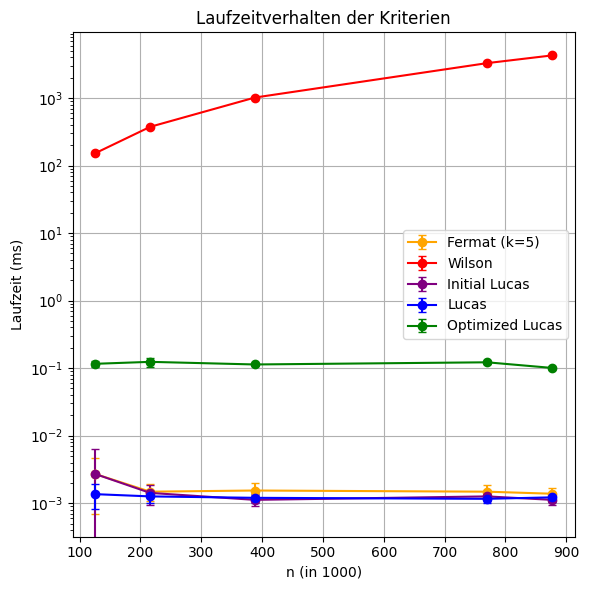

In [1]:
from src.primality.criteria import *
from src.primality.tests import *
from src.primality.criteriaProtocoll import *
from src.analysis.timing import measure_runtime
from src.analysis.plot import plot_runtime
from src.analysis.dataset import *
import random

# Input 50 random numbers between 100,000 and 1,000,000
random.seed(42)  # Für Reproduzierbarkeit
numbers = sorted(random.sample(range(100_000, 1_000_000), 5))

# Measure criteria runtimes
fermat_times = measure_runtime(lambda n: fermat_criterion(n, 5), numbers, "Fermat (k=5)", repeat=5)
wilson_times = measure_runtime(wilson_criterion, numbers, "Wilson", repeat=5)
initial_lucas_times = measure_runtime(initial_lucas_test, numbers, "Initial Lucas", repeat=5)
lucas_times = measure_runtime(lucas_test, numbers, "Lucas", repeat=5)
optimized_lucas_times = measure_runtime(optimized_lucas_test, numbers, "Optimized Lucas", repeat=5)

# save results
save_json(fermat_times, get_timestamped_filename("criteria", "json"))
export_to_csv(fermat_times, get_timestamped_filename("criteria", "csv"))

# protocoll
criteria_protocoll(numbers)

# create datasets for plotting
datasets = [fermat_times, wilson_times, initial_lucas_times, lucas_times, optimized_lucas_times]
n_values = [[entry["n"] for entry in data] for data in datasets]
avg_times = [[entry["avg_time"] for entry in data] for data in datasets]
std_devs = [[entry["std_dev"] for entry in data] for data in datasets]
labels = [data[0]["label"] for data in datasets]

# Plot
colors = ["orange", "red", "purple", "blue", "green"]
plot_runtime(n_lists=n_values, time_lists=avg_times, std_lists=std_devs, labels=labels, colors=colors, figsize=(6,6))
